In [1]:
## 타이타닉
# -*- coding: utf-9 -*-

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("C:/Users/ssuki/Desktop/workplace/python-data-analysis-master/data/titanic_train.csv")

In [3]:
df_test = pd.read_csv("C:/Users/ssuki/Desktop/workplace/python-data-analysis-master/data/titanic_test.csv")
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [4]:
print(df_train.info())
print('---------------------')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
pclass       916 non-null int64
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          741 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
ticket       916 non-null object
fare         916 non-null float64
cabin        214 non-null object
embarked     914 non-null object
body         85 non-null float64
home.dest    527 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
pclass       393 non-null int64
survived     393 non-null int64
name         393 non-null object
sex          393 non-null object
age          305 non-null float64
sibsp        393 non-null int64
parch        393 non-null int64
ticket       393 non-null object
fare        

In [5]:
# 불필요한 피처 제거하기

df_train = df_train.drop(['name', 'ticket','body', 'cabin','home.dest'], axis=1)
df_test = df_test.drop(['name', 'ticket','body', 'cabin','home.dest'], axis=1)

0    563
1    353
Name: survived, dtype: int64


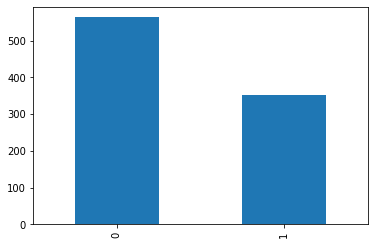

In [6]:
# 탐색적 데이터 분석하기

print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

3    498
1    230
2    188
Name: pclass, dtype: int64


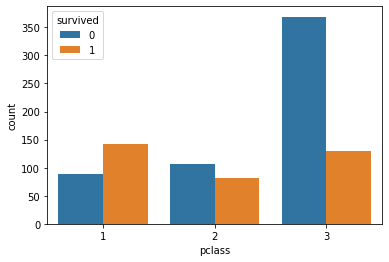

In [7]:
## 'survived'피처를 기준으로 그룹 나누어 그룹별 'pclass' 피처의 분포

print(df_train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived', data=df_train)

In [8]:
## 변수 탐색작업 자동화하기

from scipy import stats

### 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check=True):
    
    ### 두 집단('servived') 분포 그래프 출력
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    ### 두 집단의 표준편자
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print('data std is', '%.2f' % np.std(titanic_n_survived_static))
    
    ### T-test로 두 집단의 평균 차이 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print('The t-statistic and p-value assuming equal variances is %.3f and %.3f.' % tTestResult)
    print('The t-statistic and p-value not assuming equal variance is %.3f and %.3f' % tTestResultDiffVar )
    
    if distribution_check:
        ### Shaporo-Wilk 검정 : 분포의 정규성 정도 검증
        print('The w-statistic and p-value in Survived %.3f and %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('The w-statistic and p-value in Non-Survived %.3f and %.3f' % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variance is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000
data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variance is -2.446 and 0.015


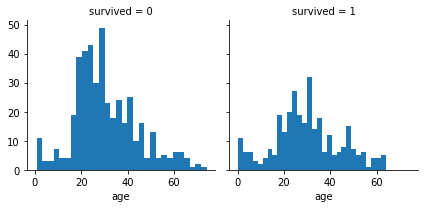

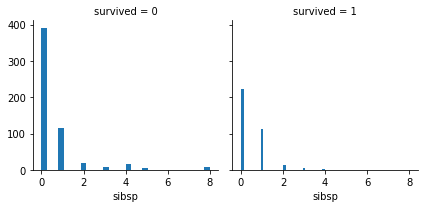

In [9]:
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)
valid_features(df_train, 'sibsp', distribution_check=False)

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variance is 1.942 and 0.052
data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variance is 6.657 and 0.000
The w-statistic and p-value in Survived 0.660 and 0.000
The w-statistic and p-value in Non-Survived 0.520 and 0.000


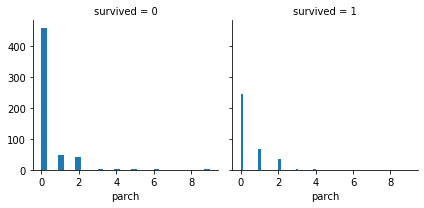

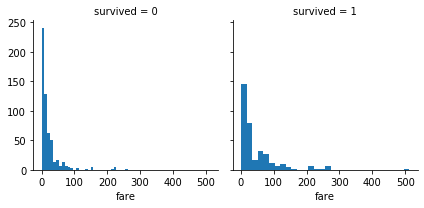

In [10]:
valid_features(df_train, 'parch', distribution_check=False)
valid_features(df_train, 'fare', distribution_check=True)

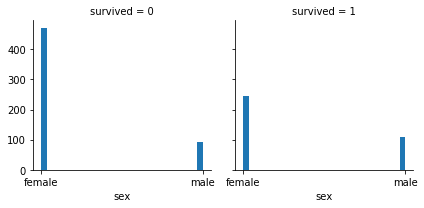

In [11]:
g = sns.FacetGrid(df_train, col='survived')
g.map(plt.hist, 'sex', bins=30)

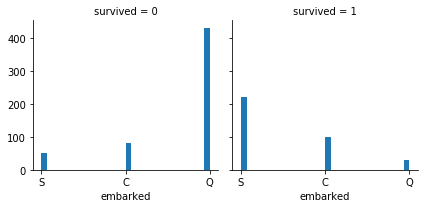

In [12]:
g = sns.FacetGrid(df_train, col='survived')
g.map(plt.hist, 'embarked', bins=30)

In [13]:
# 분류 : 생존자 분류 모델 만들기
## 분류 모델을 위해 전처리

### age의 결측값을 평균걊으로 대체
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

### embark 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

### 원-핫 인코딩을 위한 통합 데이터 프레임 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

### pandas 패키지를 이용한 원-핫 인코딩 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [14]:
## 분류 모델링 : 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 데이터를 학습 데이터 셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

### 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

### 학습한 모델의 테스트 데이터셋에 대한 예측 결과 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

C:\Users\ssuki\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
## 분류 모델 평가하기

## 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy : 0.80
Precision : 0.756
Recall : 0.673
F1 : 0.712


In [16]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


AUC : 0.838


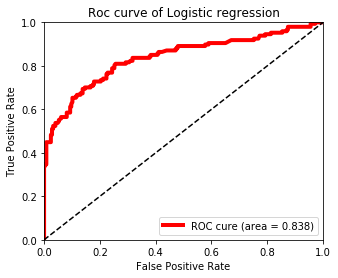

In [17]:
## 로지스틱 회귀 모델의 AUC 구하기

from sklearn.metrics import roc_curve, roc_auc_score

### AUC를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

## ROC curve 그래프 출력
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC cure (area = %0.3f)'% roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve of Logistic regression')
plt.legend(loc='lower right')

accuracy: 0.75
Precison: 0.681
Recall: 0.626
F1: 0.652
AUC: 0.740


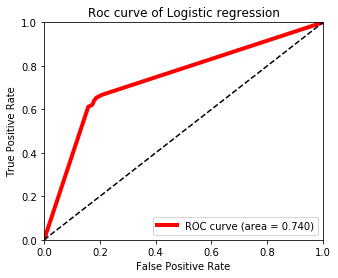

In [18]:
## 의사결정나무

from sklearn.tree import DecisionTreeClassifier

### 의사결정나무 학습하고, 학습한 모델로 예측값 반환
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

### 학습 모델의 성능 계산 
print('accuracy: %.2f'% accuracy_score(y_test, y_pred))
print('Precison: %.3f'% precision_score(y_test, y_pred))
print('Recall: %.3f'% recall_score(y_test, y_pred))
print("F1: %.3f"% f1_score(y_test, y_pred))

### 학습 모델의 AUC 계산
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC: %.3f'% roc_auc)

### ROC curve
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %.3f)'% roc_auc, color = 'red', linewidth = 4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve of Logistic regression')
plt.legend(loc='lower right')

In [19]:
# 모델 개선 : 피처 엔지니어링

## 분류 모델을 위해 전처리하기

### 데이터 다시 불러오기
df_train = pd.read_csv('../python-data-analysis-master/data/titanic_train.csv')
df_test = pd.read_csv('../python-data-analysis-master/data/titanic_test.csv')
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis=1)
df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis=1)

### 'age' 결측값 평균으로 대체
replace_mean = df_train[df_train['age'] > 0]['age'].mean
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

### 'embark' 결측값 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarekd'] = df_test['embarked'].fillna(embarked_mode)

### 원-핫 인코딩을 위한 통합 데이터프레임 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)



C:\Users\ssuki\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [20]:
## 'cabin' 피처 활용하기

### 결측 데이터 'X'로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

### 'cabin' 피처 첫 번째 알파벳 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x : x[0])

In [21]:
print(whole_df['cabin'].value_counts())

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64


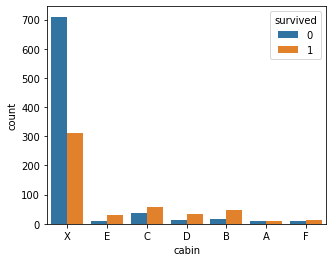

In [22]:
### 추출한 알파벳 중 'G', 'T'는 수가 너무 적어 'X'로 대체

whole_df['cabin'] = whole_df['cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='cabin', hue = 'survived', data = whole_df)
plt.show()

In [23]:
### 호칭에 따라 사회적 지위(1910년대 기준) 정의
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'],# 명예직
             'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성
             'C': ['Jonkheer', 'the Countess'], # 귀족, 작위
             'D': ['Mr', 'Don'], # 남성
             'E': ['Master'], # 젊은 남성
             'F': ['Miss', 'Mile', 'Lady']} # 젊은 여성

### 정의한 호칭의 기준에 따라 A~F의 문자로 name 피처를 다시 정의
def give_grade(x):
    grade = x.split(", ",1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

### 위의 함수를 적용하여 'name' 피처 새롭게 정의
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
print(whole_df['name'].value_counts())
              


D    758
F    261
B    201
E     61
A     24
C      2
G      2
Name: name, dtype: int64


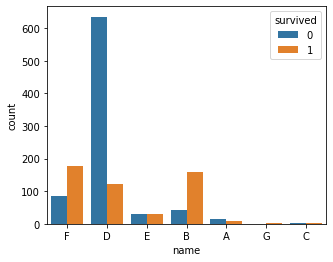

In [24]:
aname = sns.countplot(x='name', hue = 'survived', data = whole_df)
plt.show()

In [25]:
## 원-핫 인코딩

### 판다스 패키지를 이용한 원-핫 인코딩 수행
whole_df_encoded = pd.get_dummies(whole_df)


TypeError: 'Series' objects are mutable, thus they cannot be hashed